In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/BDAMLproject/Cohn-Kanade/
%cp -av dataset_vgg /content/
%cd /content/dataset_vgg

/content/gdrive/.shortcut-targets-by-id/1_EM64hzDuDKEGmg_GcyVFwb3KAu85ieN/BDAMLproject/Cohn-Kanade
'dataset_vgg' -> '/content/dataset_vgg'
'dataset_vgg/test_dataset.npy' -> '/content/dataset_vgg/test_dataset.npy'
'dataset_vgg/test_labels.npy' -> '/content/dataset_vgg/test_labels.npy'
'dataset_vgg/train_labels.npy' -> '/content/dataset_vgg/train_labels.npy'
'dataset_vgg/train_dataset.npy' -> '/content/dataset_vgg/train_dataset.npy'
/content/dataset_vgg


In [3]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [4]:
dataset_train = np.load("train_dataset.npy")
labels_train = np.load("train_labels.npy")

dataset_test = np.load("test_dataset.npy")
labels_test = np.load("test_labels.npy")

In [5]:
dataset_test = cv2.normalize(dataset_test, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
dataset_train = cv2.normalize(dataset_train, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [ ]:
dataset_train_gray = np.zeros(dataset_train.shape)
dataset_test_gray = np.zeros(dataset_test.shape)

for i in range(dataset_train.shape[0]): 
    gray = cv2.cvtColor(dataset_train[i], cv2.COLOR_BGR2GRAY) 
    dataset_train_gray[i,:,:,0] = gray
    dataset_train_gray[i,:,:,1] = gray
    dataset_train_gray[i,:,:,2] = gray

    
for i in range(dataset_test.shape[0]): 
    gray = cv2.cvtColor(dataset_test[i], cv2.COLOR_BGR2GRAY) 
    dataset_test_gray[i,:,:,0] = gray
    dataset_test_gray[i,:,:,1] = gray
    dataset_test_gray[i,:,:,2] = gray

array([1, 0, 0, 0, 0, 0, 0])

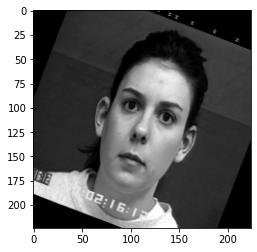

In [ ]:
plt.imshow(dataset_train_gray[10])
labels_train[10]

In [26]:
loaded = False

if not "model_vgg.h5" in os.listdir("/content/gdrive/MyDrive/BDAMLproject/VGG/"):
  model_vgg19 = VGG19(include_top=False, weights='imagenet', input_shape= dataset_train[0].shape)
  for layer in model_vgg19.layers:
    layer.trainable = False
  model = Sequential()
  model.add(model_vgg19)
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(7, activation='softmax'))

  model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = 'accuracy' )
else:
  model = load_model("/content/gdrive/MyDrive/BDAMLproject/VGG/model_vgg.h5")
  loaded = True



80142336/80134624 [==============================] - 1s 0us/step


In [27]:
if not loaded:
  history = model.fit(dataset_train, labels_train, epochs = 100, batch_size = 128, validation_split=0.2)
history = model.fit(dataset_train, labels_train, epochs = 100, batch_size = 128, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 11s 2s/step - loss: 1.8773 - accuracy: 0.2183 - val_loss: 3.4111 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 9s 2s/step - loss: 1.5939 - accuracy: 0.3649 - val_loss: 3.6519 - val_accuracy: 0.0061
Epoch 3/100
6/6 [==============================] - 9s 2s/step - loss: 1.4016 - accuracy: 0.4427 - val_loss: 3.8541 - val_accuracy: 0.0671
Epoch 4/100
6/6 [==============================] - 9s 2s/step - loss: 1.3274 - accuracy: 0.4885 - val_loss: 4.0782 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 9s 2s/step - loss: 1.1436 - accuracy: 0.5832 - val_loss: 3.6884 - val_accuracy: 0.0427
Epoch 6/100
6/6 [==============================] - 9s 2s/step - loss: 1.0496 - accuracy: 0.6229 - val_loss: 3.9051 - val_accuracy: 0.0366
Epoch 7/100
6/6 [==============================] - 9s 2s/step - loss: 1.0126 - accuracy: 0.6183 - val_loss: 4.0695 - val_accuracy: 0.0000e+00
Epoch 8/100
6/6 [====

In [8]:
if not loaded:
  fig_acc = plt.figure(figsize=(10, 10))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('LOSS')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.ylim(0.9, 1.1)
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  fig_acc = plt.figure(figsize=(10, 10))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('ACCURACY')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


In [9]:
model.evaluate(dataset_test, labels_test, batch_size=32)

10/10 [==============================] - 22s 1s/step - loss: 1.7513 - accuracy: 0.5810


[1.7512609958648682, 0.5809524059295654]

In [ ]:
%rm -r /content/gdrive/MyDrive/BDAMLproject/VGG/model_vgg.h5
model.save("/content/gdrive/MyDrive/BDAMLproject/VGG/model_vgg.h5")

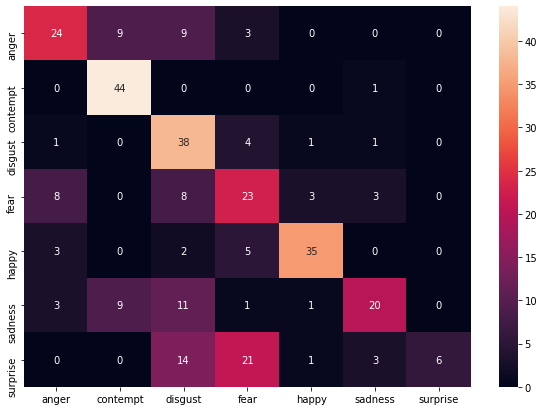

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

prediction = model.predict(dataset_test)
cm = confusion_matrix(labels_test.argmax(axis=1), prediction.argmax(axis=1))

categories = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories)

In [ ]:
%rm /content/gdrive/MyDrive/BDAMLproject/Face_Dataset/representations_vgg_face.pkl
%cd /content/gdrive/MyDrive/BDAMLproject/
%cp -av Face_Dataset /content/
%cd /content/Face_Dataset

%rm -r .ipynb_checkpoints/

rm: cannot remove '/content/gdrive/MyDrive/BDAMLproject/Face_Dataset/representations_vgg_face.pkl': No such file or directory
/content/gdrive/MyDrive/BDAMLproject
'Face_Dataset' -> '/content/Face_Dataset'
'Face_Dataset/face1.jpg' -> '/content/Face_Dataset/face1.jpg'
'Face_Dataset/face2.jpg' -> '/content/Face_Dataset/face2.jpg'
'Face_Dataset/face3.jpg' -> '/content/Face_Dataset/face3.jpg'
'Face_Dataset/face4.jpg' -> '/content/Face_Dataset/face4.jpg'
'Face_Dataset/face5.jpg' -> '/content/Face_Dataset/face5.jpg'
'Face_Dataset/face6.jpg' -> '/content/Face_Dataset/face6.jpg'
'Face_Dataset/mancini1.jpg' -> '/content/Face_Dataset/mancini1.jpg'
'Face_Dataset/mancini2.jpg' -> '/content/Face_Dataset/mancini2.jpg'
'Face_Dataset/.ipynb_checkpoints' -> '/content/Face_Dataset/.ipynb_checkpoints'
/content/Face_Dataset


In [ ]:
labels = {
    0 :  "anger",
    1 :  "contempt",
    2 :  "disgust",
    3 :  "fear",
    4 :  "happy",
    5 :  "sadness",
    6 :  "surprise",
}

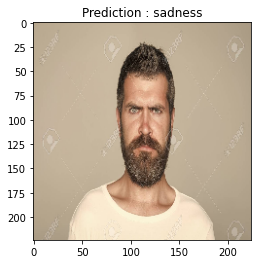

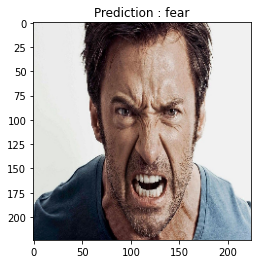

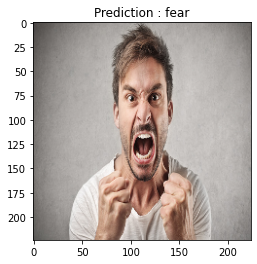

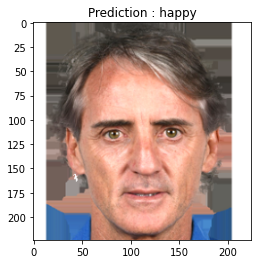

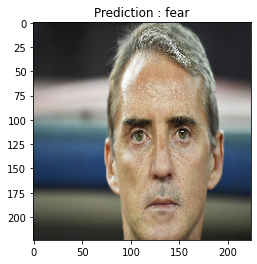

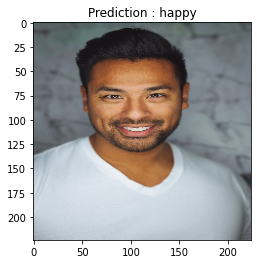

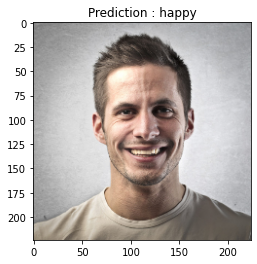

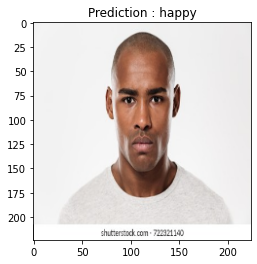

In [ ]:
lista = []
path = os.listdir("./")

for file in path:
  img = cv2.imread(file)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224,224))
  lista.append(img)

lista = np.array(lista)
prediction = model.predict(lista)

for index, img in enumerate(lista):
  plt.imshow(img)
  plt.title("Prediction : " + labels[np.argmax(prediction[index])])
  plt.show()

##Convert dataset into gray scale to DenseNet

In [18]:
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.models import Model
from keras import backend as K
from tensorflow.keras.applications.densenet import DenseNet121

In [15]:
dataset_train_gray = np.zeros(dataset_train.shape[:-1])
dataset_test_gray = np.zeros(dataset_test.shape[:-1])

for i in range(dataset_train.shape[0]): 
    dataset_train_gray[i] = cv2.cvtColor(dataset_train[i], cv2.COLOR_BGR2GRAY) 
dataset_train_gray = dataset_train_gray.reshape(dataset_train_gray.shape[0], dataset_train_gray.shape[1], dataset_train_gray.shape[2], 1)
for i in range(dataset_test.shape[0]): 
    dataset_test_gray[i] = cv2.cvtColor(dataset_test[i], cv2.COLOR_BGR2GRAY)
dataset_test_gray = dataset_test_gray.reshape(dataset_test_gray.shape[0], dataset_test_gray.shape[1], dataset_test_gray.shape[2], 1)

 

In [23]:
dataset_train.shape

(819, 224, 224, 3)

In [24]:
modelNet = DenseNet121(include_top=False, input_shape=(dataset_train.shape[1], dataset_train.shape[2], dataset_train.shape[3]))
model = Sequential()
model.add(modelNet)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss= 'categorical_crossentropy', metrics = 'accuracy')

29089792/29084464 [==============================] - 0s 0us/step


In [25]:
history = model.fit(dataset_train, labels_train, batch_size=64, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 42s 2s/step - loss: 2.0636 - accuracy: 0.3389 - val_loss: 2.7901 - val_accuracy: 0.0122
Epoch 2/100
11/11 [==============================] - 15s 1s/step - loss: 1.0550 - accuracy: 0.5969 - val_loss: 4.0122 - val_accuracy: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 15s 1s/step - loss: 0.6071 - accuracy: 0.7832 - val_loss: 4.5135 - val_accuracy: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 15s 1s/step - loss: 0.3260 - accuracy: 0.8885 - val_loss: 4.7522 - val_accuracy: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 15s 1s/step - loss: 0.2601 - accuracy: 0.9069 - val_loss: 5.0695 - val_accuracy: 0.0000e+00
Epoch 6/100
11/11 [==============================] - 15s 1s/step - loss: 0.1714 - accuracy: 0.9557 - val_loss: 6.4321 - val_accuracy: 0.0000e+00
Epoch 7/100
11/11 [==============================] - 15s 1s/step - loss: 0.1140 - accuracy: 0.9664 - val_loss: 8.2301 - val_accuracy: 

KeyboardInterrupt: ignored